In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('image_data.csv')

column_names = ['file_path', 'make', 'model', 'year']
df.columns = column_names

# Split dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

,file_path,make,model,year
140,dataset/Honda Civic 2023 exterior/9df8b3c8ba.jpg,Civic,Honda,2023
903,dataset/Hyundai Sonata 1995 exterior/ed007d58a...,Sonata,Hyundai,1995
363,dataset/Honda Accord 2015 exterior/e8bff0a966.jpg,Accord,Honda,2015
199,dataset/Lexus LS 2023 exterior/7ec4bee65a.jpg,LS,Lexus,2023
994,dataset/Buick Regal 1995 exterior/694b5f3d3e.jpg,Regal,Buick,1995
...,...,...,...,...
1095,dataset/Hyundai Elantra 2023 exterior/127f2ad1...,Elantra,Hyundai,2023
1130,dataset/Volkswagon Passat 2005 exterior/475e8d...,Passat,Volkswagon,2005
1294,dataset/Hyundai Sonata 2005 exterior/baf90dd38...,Sonata,Hyundai,2005
860,dataset/Kia Optima 2003 exterior/3959db61e7.jpg,Optima,Kia,2003


In [21]:
def generate_triplets(df):
    triplets = []
    for index, anchor in df.iterrows():
        positive_samples = df[df['year'] == anchor['year']]  # Sample cars with same year as anchor
        negative_samples = df[df['year'] != anchor['year']]  # Sample cars with different year from anchor
        if not positive_samples.empty and not negative_samples.empty:
            positive = positive_samples.sample(n=1).iloc[0]
            negative = negative_samples.sample(n=1).iloc[0]
            triplets.append((anchor, positive, negative))
    return triplets


In [33]:
train_triplets = generate_triplets(train_df)

test_triplets = generate_triplets(test_df)


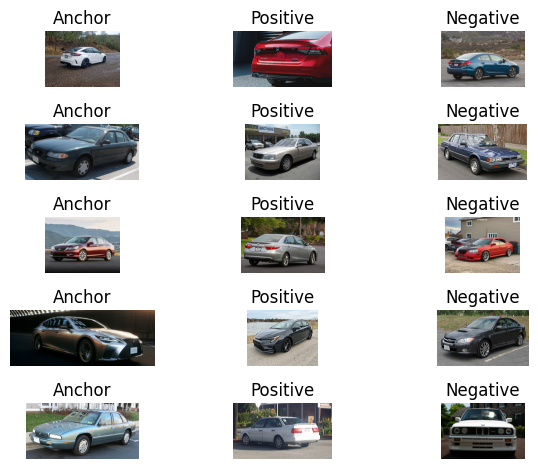

In [34]:
from PIL import Image 
# Visualize a few triplets
num_triplets_to_visualize = 5
for i in range(num_triplets_to_visualize):
    anchor, positive, negative = train_triplets[i]

    anchor_path = anchor['file_path']
    
    
    # Plot anchor sample
    anchor_image = Image.open(anchor_path)
    plt.subplot(num_triplets_to_visualize, 3, i*3 + 1)
    plt.imshow(anchor_image)  # Replace 'image' with the column name containing image data
    plt.title('Anchor')
    plt.axis('off')
    
    # Plot positive sample
    positive_image = Image.open(positive['file_path'])
    plt.subplot(num_triplets_to_visualize, 3, i*3 + 2)
    plt.imshow(positive_image)  # Replace 'image' with the column name containing image data
    plt.title('Positive')
    plt.axis('off')
    
    # Plot negative sample
    negative_image = Image.open(negative['file_path'])
    plt.subplot(num_triplets_to_visualize, 3, i*3 + 3)
    plt.imshow(negative_image)  # Replace 'image' with the column name containing image data
    plt.title('Negative')
    plt.axis('off')

plt.tight_layout()
plt.show()